\begin{equation*}
Drift = (μ - \frac{1}{2} α^²)
\end{equation*}

In [1]:
#Drift = (retorno médio diário - 0,5 x variância)

\begin{equation*}
Price\ Today = Price\ Yesterday \ x \ e^{(μ - \frac{1}{2} \sigma^²)+ \sigma Z[(0;1)]}
\end{equation*}

In [12]:
#Preço de hoje = Preço de ontem . e ^ (drift+valor aleatório)
#Se for repetido o cálculo 1000 vezes será capaz de simular a evolução do preço amanhã e avaliar a probabilidade de
#que irá seguir um certo padrão. 

In [13]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [14]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [19]:
log_returns = np.log(1+data.pct_change()) #pandas.pct_change() - fornec o retorno simples a partir de uma base de dados

In [16]:
log_returns.tail()

,PG
Date,
2019-08-30,-0.007870
2019-09-03,0.009355
2019-09-04,0.015129
2019-09-05,-0.003659
2019-09-06,0.000896


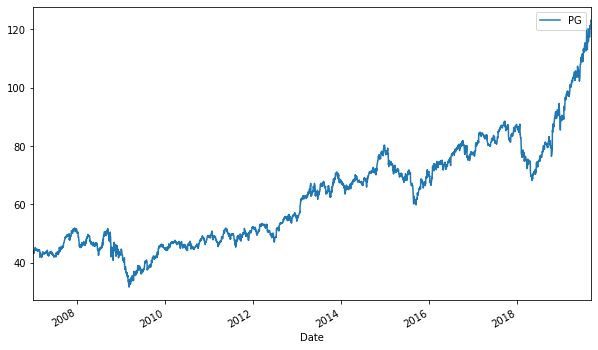

In [17]:
data.plot(figsize=(10,6)) #preços

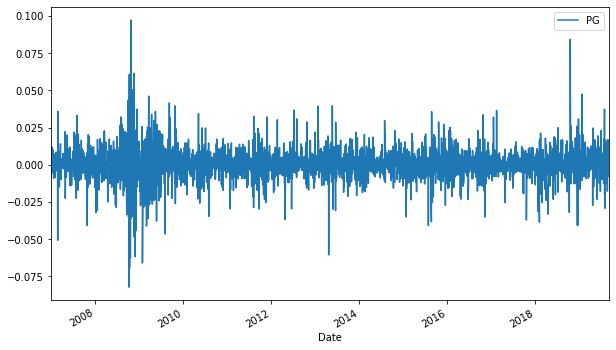

In [21]:
log_returns.plot(figsize=(10,6)) #retornos log, não preços
#distribuição normal com média estável PG

In [24]:
u = log_returns.mean()
u

PG    0.000322
dtype: float64

In [25]:
var = log_returns.var()
var

PG    0.00012
dtype: float64

\begin{equation*}
Drift = (μ - \frac{1}{2}.var)
\end{equation*}

In [26]:
drift = u - (0.5 * var)
drift

PG    0.000262
dtype: float64

In [28]:
stdev = log_returns.std() #desvio padrão dos retornos logaritmicos 
stdev

PG    0.010974
dtype: float64

In [29]:
type(drift)

pandas.core.series.Series

In [30]:
type(stdev)

pandas.core.series.Series

In [31]:
np.array(drift)

array([0.00026181])

In [32]:
drift.values

array([0.00026181])

In [33]:
stdev.values

array([0.01097363])

In [34]:
#Z corresponde a distância entre a média e os eventos, expresso pelo número de desvios padrão 
norm.ppf(0.95) #se um evento tem 95% de chance de ocorrer, a distância entre esse evento e a média vai ser aprox. 1.65
               #desvios padrão

1.6448536269514722

In [35]:
x = np.random.rand(10,2) #probabilidades geradas 
x

array([[0.30598899, 0.96088071],
       [0.68858999, 0.95163381],
       [0.70684219, 0.97802017],
       [0.05367523, 0.44767608],
       [0.58011669, 0.77607856],
       [0.0454647 , 0.68839152],
       [0.70912947, 0.80593322],
       [0.14941513, 0.93520213],
       [0.13915819, 0.17670554],
       [0.01943983, 0.64003795]])

In [36]:
norm.ppf(x) #adiciona o ppf a cada uma das distribuições geradas aleatoriamente

array([[-0.50725205,  1.76099895],
       [ 0.4918576 ,  1.66090574],
       [ 0.5441829 ,  2.0144752 ],
       [-1.61021711, -0.13153491],
       [ 0.20219201,  0.75901617],
       [-1.69051537,  0.4912962 ],
       [ 0.55084337,  0.8630071 ],
       [-1.03894512,  1.51569801],
       [-1.08410919, -0.92799322],
       [-2.06545836,  0.35856024]])

In [37]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.2315542 , -0.20780584],
       [-0.21782493, -0.49974545],
       [ 0.30204227,  1.81805495],
       [ 1.33138526,  0.38172153],
       [ 1.39559673, -1.49412377],
       [-0.53950528,  1.13287068],
       [-0.70975666, -0.83435019],
       [-0.72064275,  0.25351469],
       [ 0.17286592, -1.0770604 ],
       [-0.49062945, -0.41578063]])

In [39]:
t_intervals = 1000 #prox. mil dias
iterations = 10 #10 séries de provizões futuras

\begin{equation*}
daily\_returns = e^r
\end{equation*}

\begin{equation*}
r = drift + stdev . z
\end{equation*}

In [40]:
#numpy.exp() = calcula e^(expressão)

In [41]:
daily_returns = np.exp(drift.values+stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [43]:
daily_returns #matriz de 1000x10 com valores dos retornos diários 10 conjuntos de 1000 preços futuros aleatórios das ações

array([[0.99547583, 1.0107417 , 0.99322922, ..., 0.9924636 , 0.98102608,
        0.98914671],
       [0.98729561, 1.01895922, 0.99471255, ..., 0.98830749, 1.01236753,
        1.01284327],
       [1.00715797, 0.99762144, 1.01106667, ..., 1.03739176, 1.01532749,
        0.98735318],
       ...,
       [1.00019544, 0.99473548, 1.00284144, ..., 0.98029287, 1.01313071,
        1.00009657],
       [1.01725863, 0.97326609, 0.98360842, ..., 0.98728976, 0.99210037,
        0.98926239],
       [0.99240202, 0.99830191, 1.00163929, ..., 0.97755794, 0.99092566,
        0.98256709]])

\begin{equation*}
S_t = S_0 . daily\_returns_1
\end{equation*}
..
\begin{equation*}
S_{t+1} = S_t . daily\_returns_{t+1}
\end{equation*}
...
\begin{equation*}
S_{t+999} = S_{t+998} . daily\_returns_{t+999}
\end{equation*}

In [44]:
#Cada preço deve ser igual ao produto do preço observado no dia anterior e o retorno diário simulado.

In [48]:
S0 = data.iloc[-1] #pega o último valor, preço atual
S0 

PG    122.870003
Name: 2019-09-06 00:00:00, dtype: float64

In [49]:
price_list = np.zeros_like(daily_returns) #cria uma matriz de 1000x10 preenchida com "0"

In [47]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
price_list[0] = S0
price_list

array([[122.87000275, 122.87000275, 122.87000275, ..., 122.87000275,
        122.87000275, 122.87000275],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [51]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [52]:
price_list

array([[122.87000275, 122.87000275, 122.87000275, ..., 122.87000275,
        122.87000275, 122.87000275],
       [121.30901393, 125.19952182, 122.2203332 , ..., 121.43334426,
        124.38960132, 124.44805545],
       [122.17734028, 124.90172698, 123.57290574, ..., 125.97395111,
        126.29618169, 122.87418324],
       ...,
       [161.55941999, 163.35521024, 174.63166024, ..., 173.6902149 ,
         91.07438227, 163.02471346],
       [164.34771413, 158.98808658, 171.76917156, ..., 171.48257054,
         90.35492793, 161.27421703],
       [163.09900369, 158.71811017, 172.05075096, ..., 167.63414795,
         89.53501664, 158.4627376 ]])

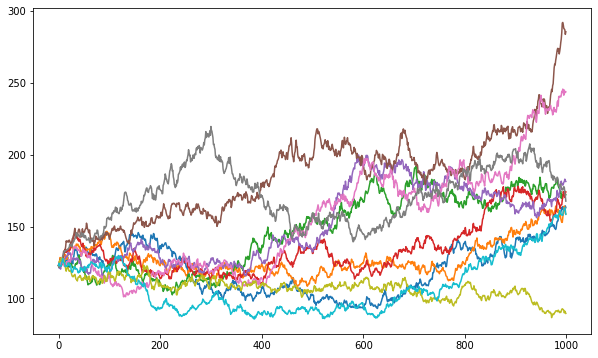

In [53]:
plt.figure(figsize=(10,6))
plt.plot(price_list)